In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
trans_fee=pd.read_csv("data/new/Public_transportation_fee.csv",encoding="utf-8")
trans_fee.head()

,date,City bus trunk line,City bus wide area,City bus circulation,City bus late at night,Town bus,Subway,Texi,Model Texi
0,2015-01-01,1200,2300,1100,2150,900,1250,3000,5000
1,2015-02-01,1200,2300,1100,2150,900,1250,3000,5000
2,2015-03-01,1200,2300,1100,2150,900,1250,3000,5000
3,2015-04-01,1200,2300,1100,2150,900,1250,3000,5000
4,2015-05-01,1200,2300,1100,2150,900,1250,3000,5000


In [3]:
trans_fee.shape

(112, 9)

In [4]:
trans_fee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   date                    112 non-null    object
 1   City bus trunk line     112 non-null    int64 
 2   City bus wide area      112 non-null    int64 
 3   City bus circulation    112 non-null    int64 
 4   City bus late at night  112 non-null    int64 
 5   Town bus                112 non-null    int64 
 6   Subway                  112 non-null    int64 
 7   Texi                    112 non-null    int64 
 8   Model Texi              112 non-null    int64 
dtypes: int64(8), object(1)
memory usage: 8.0+ KB


In [6]:
trans_fee.describe()

,City bus trunk line,City bus wide area,City bus circulation,City bus late at night,Town bus,Subway,Texi,Model Texi
count,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000
mean,1242.857143,2400.000000,1142.857143,2200.000000,942.857143,1271.428571,3600.000000,5928.571429
std,105.449946,246.049874,105.449946,123.024937,105.449946,52.724973,616.879681,824.340148
min,1200.000000,2300.000000,1100.000000,2150.000000,900.000000,1250.000000,3000.000000,5000.000000
25%,1200.000000,2300.000000,1100.000000,2150.000000,900.000000,1250.000000,3000.000000,5000.000000
50%,1200.000000,2300.000000,1100.000000,2150.000000,900.000000,1250.000000,3800.000000,6500.000000
75%,1200.000000,2300.000000,1100.000000,2150.000000,900.000000,1250.000000,3800.000000,6500.000000
max,1500.000000,3000.000000,1400.000000,2500.000000,1200.000000,1400.000000,4800.000000,7000.000000


In [7]:
trans_fee.dtypes

date                      object
City bus trunk line        int64
City bus wide area         int64
City bus circulation       int64
City bus late at night     int64
Town bus                   int64
Subway                     int64
Texi                       int64
Model Texi                 int64
dtype: object

In [9]:
#날짜 형식 변경
trans_fee['date'] = pd.to_datetime(trans_fee['date'])

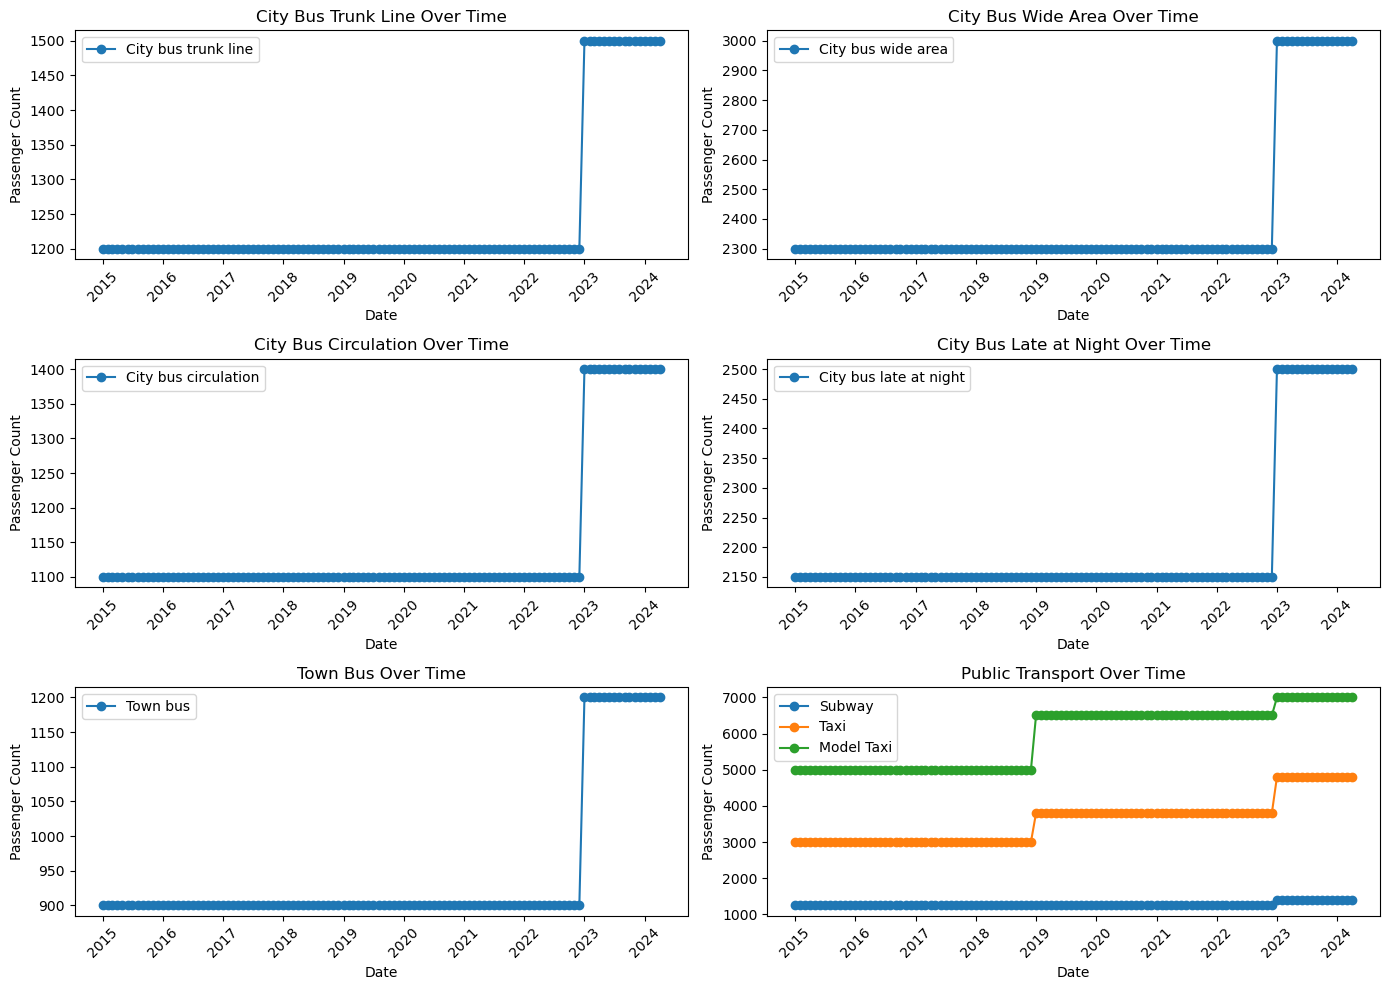

In [12]:
# 그래프 그리기
plt.figure(figsize=(14, 10))

# 도시 버스 그래프
plt.subplot(3, 2, 1)
plt.plot(trans_fee['date'], trans_fee['City bus trunk line'], marker='o', linestyle='-', label='City bus trunk line')
plt.title('City Bus Trunk Line Over Time')
plt.xlabel('Date')
plt.ylabel('Passenger Count')
plt.xticks(rotation=45)
plt.legend()

plt.subplot(3, 2, 2)
plt.plot(trans_fee['date'],  trans_fee['City bus wide area'], marker='o', linestyle='-', label='City bus wide area')
plt.title('City Bus Wide Area Over Time')
plt.xlabel('Date')
plt.ylabel('Passenger Count')
plt.xticks(rotation=45)
plt.legend()

plt.subplot(3, 2, 3)
plt.plot(trans_fee['date'],  trans_fee['City bus circulation'], marker='o', linestyle='-', label='City bus circulation')
plt.title('City Bus Circulation Over Time')
plt.xlabel('Date')
plt.ylabel('Passenger Count')
plt.xticks(rotation=45)
plt.legend()

plt.subplot(3, 2, 4)
plt.plot(trans_fee['date'],  trans_fee['City bus late at night'], marker='o', linestyle='-', label='City bus late at night')
plt.title('City Bus Late at Night Over Time')
plt.xlabel('Date')
plt.ylabel('Passenger Count')
plt.xticks(rotation=45)
plt.legend()

plt.subplot(3, 2, 5)
plt.plot(trans_fee['date'],  trans_fee['Town bus'], marker='o', linestyle='-', label='Town bus')
plt.title('Town Bus Over Time')
plt.xlabel('Date')
plt.ylabel('Passenger Count')
plt.xticks(rotation=45)
plt.legend()

plt.subplot(3, 2, 6)
plt.plot(trans_fee['date'], trans_fee['Subway'], marker='o', linestyle='-', label='Subway')
plt.plot(trans_fee['date'], trans_fee['Texi'], marker='o', linestyle='-', label='Taxi')
plt.plot(trans_fee['date'], trans_fee['Model Texi'], marker='o', linestyle='-', label='Model Taxi')
plt.title('Public Transport Over Time')
plt.xlabel('Date')
plt.ylabel('Passenger Count')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

In [13]:
# 한 번만 실행 가능합니다. 다시 실행할 때는 Kernel을 재시작 해주세요
# date 컬럼을 인덱스로 설정
trans_fee.set_index('date', inplace=True)

# 데이터프레임의 인덱스를 다시 초기화하여 일별 데이터로 확장
trans_fee = trans_fee.resample('D').ffill()

# 데이터프레임의 인덱스를 다시 초기화하고, 날짜를 원하는 형식으로 변환
trans_fee.reset_index(inplace=True)
trans_fee['date'] = trans_fee['date'].dt.strftime('%Y-%m-%d')

# 결과 출력
trans_fee

,date,City bus trunk line,City bus wide area,City bus circulation,City bus late at night,Town bus,Subway,Texi,Model Texi
0,2015-01-01,1200,2300,1100,2150,900,1250,3000,5000
1,2015-01-02,1200,2300,1100,2150,900,1250,3000,5000
2,2015-01-03,1200,2300,1100,2150,900,1250,3000,5000
3,2015-01-04,1200,2300,1100,2150,900,1250,3000,5000
4,2015-01-05,1200,2300,1100,2150,900,1250,3000,5000
...,...,...,...,...,...,...,...,...,...
3374,2024-03-28,1500,3000,1400,2500,1200,1400,4800,7000
3375,2024-03-29,1500,3000,1400,2500,1200,1400,4800,7000
3376,2024-03-30,1500,3000,1400,2500,1200,1400,4800,7000
3377,2024-03-31,1500,3000,1400,2500,1200,1400,4800,7000


In [14]:
trans_fee.to_csv('Trans_fee_cleaned.csv',index=False)